# 神经网络训练过程的一些拾遗


参考:
- [梯度爆炸与梯度消失是什么？有什么影响？如何解决？](https://blog.csdn.net/ftimes/article/details/105837637)
- [深度学习之3——梯度爆炸与梯度消失](https://zhuanlan.zhihu.com/p/68579467)
- [详解激活函数（Sigmoid/Tanh/ReLU/Leaky ReLu等）](https://zhuanlan.zhihu.com/p/427541517)
- [Covariate Shift](https://zhuanlan.zhihu.com/p/205183444)
- [深度学习中 Internal Covariate Shift 问题以及 Batch Normalization 的作用](https://blog.csdn.net/qq_37344125/article/details/119081945)
- [深入理解Batch Normalization原理与作用](https://blog.csdn.net/litt1e/article/details/105817224)
- [啃一啃神经网络——权重初始化](https://zhuanlan.zhihu.com/p/102708578)
- [深度学习中所有的优化器的详细介绍与列表化对比分析](https://blog.csdn.net/Strive_For_Future/article/details/108473033)
- [深度学习（一）优化算法之动量法详解](https://blog.csdn.net/qq_39809262/article/details/117529141#:~:text=%E6%9C%AC%E8%B4%A8%E4%B8%8A%E8%AF%B4%EF%BC%8C%E5%8A%A8%E9%87%8F%E6%B3%95%E5%B0%B1%E4%BB%BF%E4%BD%9B%E6%88%91%E4%BB%AC%E4%BB%8E%E9%AB%98%E5%9D%A1%E4%B8%8A%E6%8E%A8%E4%B8%80%E4%B8%AA%E7%90%83%EF%BC%8C%E5%B0%8F%E7%90%83%E5%9C%A8%E5%90%91%E4%B8%8B%E6%BB%9A%E5%8A%A8%E7%9A%84%E8%BF%87%E7%A8%8B%E4%B8%AD%E7%A7%AF%E7%B4%AF%E4%BA%86%E5%8A%A8%E9%87%8F%EF%BC%8C%E5%9C%A8%E9%80%94%E4%B8%AD%E4%B9%9F%E4%BC%9A%E5%8F%98%E5%BE%97%E8%B6%8A%E6%9D%A5%E8%B6%8A%E5%BF%AB%EF%BC%8C%E6%9C%80%E5%90%8E%E4%BC%9A%E8%BE%BE%E5%88%B0%E4%B8%80%E4%B8%AA%E5%B3%B0%E5%80%BC%EF%BC%8C%E5%AF%B9%E5%BA%94%E4%BA%8E%E6%88%91%E4%BB%AC%E7%9A%84%E7%AE%97%E6%B3%95%E4%B8%AD%E5%B0%B1%E6%98%AF%EF%BC%8C%E5%8A%A8%E9%87%8F%E9%A1%B9%E4%BC%9A%E6%B2%BF%E7%9D%80%E6%A2%AF%E5%BA%A6%E6%8C%87%E5%90%91%E6%96%B9%E5%90%91%E7%9B%B8%E5%90%8C%E7%9A%84%E6%96%B9%E5%90%91%E4%B8%8D%E6%96%AD%E5%A2%9E%E5%A4%A7%EF%BC%8C%E5%AF%B9%E4%BA%8E%E6%A2%AF%E5%BA%A6%E6%96%B9%E5%90%91%E6%94%B9%E5%8F%98%E7%9A%84%E6%96%B9%E5%90%91%E9%80%90%E6%B8%90%E5%87%8F%E5%B0%8F%EF%BC%8C%E5%BE%97%E5%88%B0%E4%BA%86%E6%9B%B4%E5%BF%AB%E7%9A%84%E6%94%B6%E6%95%9B%E9%80%9F%E5%BA%A6%E4%BB%A5%E5%8F%8A%E6%9B%B4%E5%B0%8F%E7%9A%84%E9%9C%87%E8%8D%A1%E3%80%82%20%E4%B8%8B%E9%9D%A2%E6%88%91%E4%BB%AC%E6%89%8B%E5%8A%A8%E5%AE%9E%E7%8E%B0%E4%B8%80%E4%B8%AA%E5%8A%A8%E9%87%8F%E6%B3%95%EF%BC%8C%E5%85%AC%E5%BC%8F%E5%B7%B2%E7%BB%8F%E5%9C%A8%E4%B8%8A%E9%9D%A2%E4%BA%86%3A%20v%5B%3A%5D%20%3D%20gamma,%2A%20v%20%2B%20lr%20%2A%20param.grad.data)

### 1. 梯度爆炸/梯度消失/梯度饱和

#### 1.1 Activation Functions

- **Sigmoid**: $f(z) = \frac{1}{1+e^{-z}}$
- **Tanh**: $f(z) = \frac{2}{1+e^{-2z}} - 1$ 
    - Activations **around 0** are better for gradient descent convergence
- **Rectified Linear (ReLU)**: $f(z) = max(0,z)$ 
    - Less smooth, but much faster (note: not differentiable at 0)
- **Leaky ReLU**: $f(z) = \begin{cases} 0.01z & z<0 \\ z & otherwise \end{cases}$ 

- **ReLU vs Tanh**: What is the effect of using non-smooth activation functions?
    * ReLU produces piecewise-linear boundaries, but allows deeper networks
    * Tanh produces smoother decision boundaries, but is slower


In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig_scale = 0.5

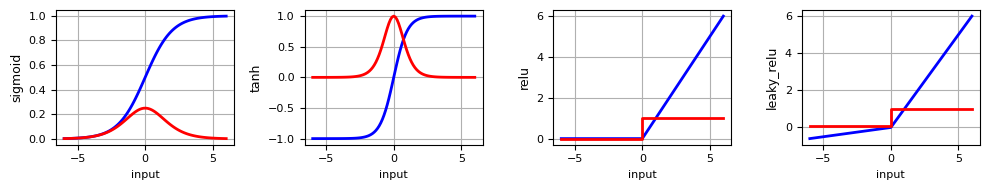

In [5]:
def activation(X, function="sigmoid"):     
    if function == "sigmoid":      
        return 1.0/(1.0 + np.exp(-X))    
    if function == "softmax": 
        return np.exp(X) / np.sum(np.exp(X), axis=0)   
    elif function == "tanh":      
        return np.tanh(X)    
    elif function == "relu":      
        return np.maximum(0,X)    
    elif function == "leaky_relu":      
        return np.maximum(0.1*X,X)
    elif function == "none":      
        return X
    
def activation_derivative(X, function="sigmoid"):   
    if function == "sigmoid": 
        sig = 1.0/(1.0 + np.exp(-X))   
        return sig * (1 - sig)
    elif function == "tanh":      
        return 1 - np.tanh(X)**2   
    elif function == "relu":      
        return np.where(X > 0, 1, 0)
    elif function == "leaky_relu":    
        # Using 0.1 instead of 0.01 to make it visible in the plot
        return np.where(X > 0, 1, 0.1)
    elif function == "none":      
        return X/X
    
def plot_activation(function, ax, derivative=False):
    if function=="softmax":       
        x = np.linspace(-6,6,9)
        ax.plot(x,activation(x, function),lw=2, c='b', linestyle='-', marker='o')
    else:     
        x = np.linspace(-6,6,101)
        ax.plot(x,activation(x, function),lw=2, c='b', linestyle='-') 
        if derivative:
            if function == "relu" or function == "leaky_relu":
                ax.step(x,activation_derivative(x, function),lw=2, c='r', linestyle='-')
            else:
                ax.plot(x,activation_derivative(x, function),lw=2, c='r', linestyle='-')
    ax.set_xlabel("input", fontsize=16*fig_scale)
    ax.set_ylabel(function, fontsize=18*fig_scale)
    ax.tick_params(axis='both', labelsize=16*fig_scale)
    ax.grid()
    
functions = ["sigmoid","tanh","relu","leaky_relu"]

def plot_activations(function=functions):
    fig, ax = plt.subplots(figsize=(5,1.5))
    plot_activation(function, ax)
    plt.show()


fig, axes = plt.subplots(1,4, figsize=(10,2))
for function, ax in zip(functions,axes):
    plot_activation(function, ax, derivative=True)
plt.tight_layout();

#### 1.2. Activation Functions for Output Layer

* _sigmoid_ converts output to probability in [0,1]
    * For binary classification 
* _softmax_ converts all outputs (aka 'logits') to probabilities that sum up to 1
    * For multi-class classification ($k$ classes)
    * Can cause over-confident models. If so, smooth the labels: $y_{smooth} = (1-\alpha)y + \frac{\alpha}{k}$
$$\text{softmax}(\mathbf{x},i) = \frac{e^{x_i}}{\sum_{j=1}^k e^{x_j}}$$
* For **regression**, don't use any activation function, let the model learn the exact target




### 2. 权重初始化


- Initializing weights to 0 is bad: all gradients in layer will be identical (symmetry)
- Too small random weights shrink activations to 0 along the layers (vanishing gradient)
- Too large random weights multiply along layers (exploding gradient, zig-zagging)
- Ideal: small random weights + variance of input and output gradients remains the same
  - **Glorot/Xavier initialization** (for tanh): randomly sample from  $N(0,\sigma), \sigma = \sqrt{\frac{2}{{fan_{in} + fan_{out}}}}$
    - $fan_{in}$: number of input units, $fan_{out}$: number of output units
  - **He initialization** (for ReLU): randomly sample from  $N(0,\sigma), \sigma = \sqrt{\frac{2}{{fan_{in}}}}$
  - **Uniform sampling** (instead of $N(0,\sigma)$) for deeper networks (w.r.t. vanishing gradients)


### 3. Covariate Shift

### 4. Batch Normalization

### 5. Optimization

#### 5.1. Momentum

* Imagine a ball rolling downhill: accumulates momentum, doesn't exactly follow steepest descent
    * Reduces oscillation, follows larger (consistent) gradient of the loss surface
* Adds a velocity vector $\mathbf{v}$ with momentum $\gamma$ (e.g. 0.9, or increase from $\gamma=0.5$ to $\gamma=0.99$)
$$\mathbf{w}_{(s+1)} = \mathbf{w}_{(s)} + \mathbf{v}_{(s)} \qquad \text{with} \qquad
\color{blue}{\mathbf{v}_{(s)}} = \color{green}{\gamma \mathbf{v}_{(s-1)}} - \color{red}{\eta \nabla \mathcal{L}(\mathbf{w}_{(s)})}$$
* Nesterov momentum: Look where momentum step would bring you, compute gradient there 
    * Responds faster (and reduces momentum) when the gradient changes
$$\color{blue}{\mathbf{v}_{(s)}} = \color{green}{\gamma \mathbf{v}_{(s-1)}} - \color{red}{\eta \nabla \mathcal{L}(\mathbf{w}_{(s)} + \gamma \mathbf{v}_{(s-1)})}$$

#### 5.2. Adaptive gradients

#### 5.3. ADAM


* Adam: RMSProp + momentum. Adds moving average for gradients as well ($\gamma_2$ = momentum): 
    * Adds a bias correction to avoid small initial gradients: $\hat{m}_{i,(s)} = \frac{m_{i,(s)}}{1-\gamma}$ and $\hat{g}_{i,(s)} = \frac{g_{i,(s)}}{1-\gamma_2}$
    $$g_{i,(s)} = \gamma_2 g_{i,(s-1)} + (1-\gamma_2) \nabla \mathcal{L}(w_{i,(s)})$$
    $$w_{i,(s+1)} = w_{i,(s)}- \frac{\eta}{\sqrt{\hat{m}_{i,(s)}+\epsilon}} \hat{g}_{i,(s)}$$

* Adamax: Idem, but use max() instead of moving average: $u_{i,(s)} = max(\gamma u_{i,(s-1)}, |\mathcal{L}(w_{i,(s)})|)$
$$w_{i,(s+1)} = w_{i,(s)}- \frac{\eta}{u_{i,(s)}} \hat{g}_{i,(s)}$$


### 6. Techniques to avoid over-fitting

#### 6.1. Label Smoothing 

`Label Smoothing` 是一种正则化技术, 旨在提高分类模型的泛化能力. 其基本思想是在**训练过程**中对标签进行轻微的平滑, 从而避免模型对训练数据的过度拟合. 


- 传统标签: 在多类分类任务中, 通常使用独热编码,即正确类别的标签为 1, 其余类别为 0. 例如, 对于10个类别的任务, 标签 `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]` 代表数据的类别是第三类.

- 平滑标签: 使用 `label smoothing` 后, 真实标签会被调整为一个**较小的值**, 其他标签则会从0变大. 例如, 使用平滑参数 `0.1`, 可以将原标签 `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]` 转换为 `[0.1, 0.1, 0.8, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]`, 其中 `0.1` 是根据平滑参数均匀分配给其他类别的概率.

**优势**: 
- **减少过拟合:** 通过减少模型对单一标签的信任程度, label smoothing 可以帮助模型更好地泛化到未见数据

- **提高鲁棒性:** 在面对噪声标签时, 平滑标签可以使模型更鲁棒, 因为它不再对错误标签过于敏感

- **改进模型输出:** 有助于模型产生更平滑的概率分布, 使得模型的输出更符合真实分布

**适用场景**: `Label smoothing` 主要用于分类任务

```python
self.criterion = nn.CrossEntropyLoss(label_smoothing=0.01)
```

#### 6.2. Early stop

**早停法**旨在防止模型过拟合并提高模型的泛化能力.

- **目的** 停止训练: 当验证损失(或验证准确率) 在几个训练周期内没有改善时, 停止模型的训练. 这样可以避免模型在训练集上过拟合, 而在验证集上表现不佳.

- **处理波动**: 在训练过程中,验证损失可能会出现波动(即有时下降, 有时上升), 这可能会导致误判训练是否应停止.

    - 使用移动平均

    - 等待 $k$ 步: 设定一个阈值 $k$, 在 $k$ 个训练步骤内如果没有改善, 则停止训练. 


``` python
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor="val_loss", mode="min", # minimize validation loss
    patience=3)                     # Number of epochs with no improvement before stopping
          
# Update the Trainer to include early stopping as a callback
trainer = pl.Trainer(
    max_epochs=10, accelerator=accelerator,
    callbacks=[TrainingPlotCallback(), early_stopping]  # Attach the callbacks
)
```

#### 6.3. Regularization and memorization capacity

**模型容量即可学习参数的数量(memorization capacity)**:模型中可调整的参数数量被称为模型的 *容量*. 模型的容量影响其学习能力和泛化能力. 


- 记忆与泛化
    - 训练集**记忆**: 在极端情况下,模型可以通过调整权重来"记住"训练集中的所有样本,而不是学到泛化的特征.

    - 小模型的优势: 较小的模型被迫学习更紧凑的表示, 这通常有助于提高泛化能力. 

-  寻找最佳容量: 开始时使用较少的参数,逐渐增加参数数量,直到出现过拟合现象.这种方法能够帮助确定模型的最佳容量.


- 避免瓶颈: 确保网络层的设计不导致信息丢失. 例如, 某些层节点过少可能会限制模型的表达能力, 导致性能下降.

#### 6.4. Weight regularization (weight decay)
* We can also add weight regularization to our loss function (or invent your own)
- L1 regularization: leads to _sparse networks_ with many weights that are 0
- L2 regularization: leads to many very small weights

``` python
def training_step(self, batch, batch_idx):
    X_batch, y_batch = batch
    outputs = self(X_batch)                 
    loss = self.criterion(outputs, y_batch)
    l1_lambda = 1e-5 # L1 Regularization
    l1_loss = sum(p.abs().sum() for p in self.parameters())
    l2_lambda = 1e-4 # L2 Regularization
    l2_loss = sum((p ** 2).sum() for p in self.parameters())
    return loss + l2_lambda * l2_loss  # Using L2 only
```

Alternative: set `weight_decay` in the optimizer (only for L2 loss)

``` python
def configure_optimizers(self):
    return optim.RMSprop(self.parameters(), lr=0.001, momentum=0.0, weight_decay=1e-4)
```

#### 6.5. Dropout


`Dropout` 是一种常用的正则化技术,用于防止神经网络的过拟合.其核心思想是在训练过程中随机丢弃一部分神经元,使得模型在学习时不会依赖于任何特定的神经元.这种方法可以提高模型的泛化能力.
- **Idea:** break up accidental non-significant learned patterns 
- ***Dropout rate $p$***: fraction of the outputs that are zeroed-out (e.g. 0.1 - 0.5)
    - Use higher dropout rates for deeper networks
- **Use higher dropout in early layers, lower dropout later**
    - Early layers are usually larger, deeper layers need stability
- **测试阶段**: 在测试或推理阶段, 所有神经元都被使用, 但通常会将权重乘以 &(1−𝑝)$ 以保持输出的一致性
- Dropout 可以在全连接层, 卷积层等多种层中使用.

``` python
def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.dropout1 = nn.Dropout(p=0.2)  # 20% dropout
    self.fc2 = nn.Linear(512, 512)
    self.dropout2 = nn.Dropout(p=0.1)  # 10% dropout
    self.fc3 = nn.Linear(512, 10)

def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)  # Apply dropout
    x = F.relu(self.fc2(x))
    x = self.dropout2(x)  # Apply dropout
    return self.fc3(x)
```
- 经过 Dropout 层后, 被丢弃的神经元对应的值会变为 0